## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.519228  0.823819  0.418280  1.615553 -1.613193  0.914207
1 -0.747472  0.499195 -1.129219  0.877674 -0.729111  0.463543
2 -0.375779  0.190834 -0.946084 -1.737304  0.912523 -0.559801
3 -0.080561 -1.367828  0.188471 -0.091305  0.263449 -1.277249
4 -1.357981  1.812414  0.277099  0.169703 -0.603447 -1.036740


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9811459	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9716522	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9626962	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9536516	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9459296	total: 59.8ms	remaining: 11.9s
5:	learn: 0.9364956	total: 60.3ms	remaining: 9.99s
6:	learn: 0.9278806	total: 60.9ms	remaining: 8.63s
7:	learn: 0.9190668	total: 61.4ms	remaining: 7.62s
8:	learn: 0.9110857	total: 62.1ms	remaining: 6.83s
9:	learn: 0.9037607	total: 62.6ms	remaining: 6.19s
10:	learn: 0.8945128	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8859361	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8770294	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8693771	total: 64.8ms	remaining: 4.57s
14:	learn: 0.8619546	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8547914	total: 65.8ms	remaining: 4.05s
16:	learn: 0.8471969	total: 66.3ms	remaining: 3.83s
17:	learn: 0.8400796	total: 66.8ms	remaining: 3.64s
18:	learn: 0.8315941	total: 67.2ms	remaining

106:	learn: 0.3988082	total: 108ms	remaining: 899ms
107:	learn: 0.3957466	total: 108ms	remaining: 894ms
108:	learn: 0.3927953	total: 109ms	remaining: 890ms
109:	learn: 0.3902642	total: 109ms	remaining: 884ms
110:	learn: 0.3867666	total: 110ms	remaining: 878ms
111:	learn: 0.3839656	total: 110ms	remaining: 873ms
112:	learn: 0.3809078	total: 111ms	remaining: 869ms
113:	learn: 0.3780420	total: 111ms	remaining: 865ms
114:	learn: 0.3750664	total: 112ms	remaining: 860ms
115:	learn: 0.3722667	total: 112ms	remaining: 855ms
116:	learn: 0.3687759	total: 113ms	remaining: 850ms
117:	learn: 0.3661155	total: 113ms	remaining: 847ms
118:	learn: 0.3634566	total: 114ms	remaining: 843ms
119:	learn: 0.3607655	total: 114ms	remaining: 838ms
120:	learn: 0.3576246	total: 115ms	remaining: 834ms
121:	learn: 0.3549455	total: 115ms	remaining: 830ms
122:	learn: 0.3526575	total: 116ms	remaining: 825ms
123:	learn: 0.3503693	total: 116ms	remaining: 822ms
124:	learn: 0.3477324	total: 117ms	remaining: 818ms
125:	learn: 

267:	learn: 0.1212063	total: 187ms	remaining: 510ms
268:	learn: 0.1202844	total: 187ms	remaining: 509ms
269:	learn: 0.1195124	total: 188ms	remaining: 508ms
270:	learn: 0.1187564	total: 188ms	remaining: 507ms
271:	learn: 0.1178847	total: 189ms	remaining: 505ms
272:	learn: 0.1169212	total: 189ms	remaining: 504ms
273:	learn: 0.1161079	total: 190ms	remaining: 502ms
274:	learn: 0.1152144	total: 190ms	remaining: 501ms
275:	learn: 0.1143705	total: 191ms	remaining: 500ms
276:	learn: 0.1135336	total: 191ms	remaining: 499ms
277:	learn: 0.1128056	total: 192ms	remaining: 497ms
278:	learn: 0.1120082	total: 192ms	remaining: 496ms
279:	learn: 0.1110792	total: 192ms	remaining: 494ms
280:	learn: 0.1101975	total: 193ms	remaining: 493ms
281:	learn: 0.1094655	total: 193ms	remaining: 492ms
282:	learn: 0.1085896	total: 194ms	remaining: 491ms
283:	learn: 0.1079320	total: 194ms	remaining: 489ms
284:	learn: 0.1071485	total: 195ms	remaining: 488ms
285:	learn: 0.1062952	total: 195ms	remaining: 487ms
286:	learn: 

488:	learn: 0.0343615	total: 291ms	remaining: 305ms
489:	learn: 0.0341969	total: 292ms	remaining: 304ms
490:	learn: 0.0340723	total: 292ms	remaining: 303ms
491:	learn: 0.0338838	total: 293ms	remaining: 303ms
492:	learn: 0.0338259	total: 293ms	remaining: 302ms
493:	learn: 0.0336421	total: 294ms	remaining: 301ms
494:	learn: 0.0335887	total: 295ms	remaining: 301ms
495:	learn: 0.0333980	total: 295ms	remaining: 300ms
496:	learn: 0.0332419	total: 295ms	remaining: 299ms
497:	learn: 0.0331898	total: 296ms	remaining: 298ms
498:	learn: 0.0331383	total: 297ms	remaining: 298ms
499:	learn: 0.0329632	total: 297ms	remaining: 297ms
500:	learn: 0.0328221	total: 298ms	remaining: 296ms
501:	learn: 0.0326722	total: 298ms	remaining: 296ms
502:	learn: 0.0326230	total: 299ms	remaining: 295ms
503:	learn: 0.0324429	total: 299ms	remaining: 294ms
504:	learn: 0.0323945	total: 299ms	remaining: 293ms
505:	learn: 0.0322183	total: 300ms	remaining: 293ms
506:	learn: 0.0321707	total: 300ms	remaining: 292ms
507:	learn: 

646:	learn: 0.0179071	total: 370ms	remaining: 202ms
647:	learn: 0.0178386	total: 371ms	remaining: 201ms
648:	learn: 0.0177578	total: 371ms	remaining: 201ms
649:	learn: 0.0177277	total: 372ms	remaining: 200ms
650:	learn: 0.0176590	total: 372ms	remaining: 199ms
651:	learn: 0.0176061	total: 373ms	remaining: 199ms
652:	learn: 0.0175771	total: 373ms	remaining: 198ms
653:	learn: 0.0175038	total: 373ms	remaining: 197ms
654:	learn: 0.0174132	total: 374ms	remaining: 197ms
655:	learn: 0.0173845	total: 374ms	remaining: 196ms
656:	learn: 0.0173090	total: 374ms	remaining: 196ms
657:	learn: 0.0172767	total: 375ms	remaining: 195ms
658:	learn: 0.0172450	total: 375ms	remaining: 194ms
659:	learn: 0.0171741	total: 376ms	remaining: 194ms
660:	learn: 0.0171049	total: 376ms	remaining: 193ms
661:	learn: 0.0170385	total: 377ms	remaining: 192ms
662:	learn: 0.0170117	total: 377ms	remaining: 192ms
663:	learn: 0.0169442	total: 378ms	remaining: 191ms
664:	learn: 0.0168749	total: 378ms	remaining: 190ms
665:	learn: 

868:	learn: 0.0080497	total: 475ms	remaining: 71.5ms
869:	learn: 0.0080271	total: 475ms	remaining: 71ms
870:	learn: 0.0079966	total: 476ms	remaining: 70.5ms
871:	learn: 0.0079642	total: 476ms	remaining: 69.9ms
872:	learn: 0.0079499	total: 477ms	remaining: 69.3ms
873:	learn: 0.0079401	total: 477ms	remaining: 68.8ms
874:	learn: 0.0079102	total: 477ms	remaining: 68.2ms
875:	learn: 0.0078943	total: 478ms	remaining: 67.6ms
876:	learn: 0.0078805	total: 478ms	remaining: 67.1ms
877:	learn: 0.0078710	total: 479ms	remaining: 66.5ms
878:	learn: 0.0078394	total: 479ms	remaining: 66ms
879:	learn: 0.0078225	total: 480ms	remaining: 65.4ms
880:	learn: 0.0078133	total: 480ms	remaining: 64.9ms
881:	learn: 0.0077823	total: 481ms	remaining: 64.3ms
882:	learn: 0.0077739	total: 481ms	remaining: 63.8ms
883:	learn: 0.0077586	total: 482ms	remaining: 63.2ms
884:	learn: 0.0077456	total: 483ms	remaining: 62.7ms
885:	learn: 0.0077164	total: 483ms	remaining: 62.2ms
886:	learn: 0.0076859	total: 484ms	remaining: 61.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

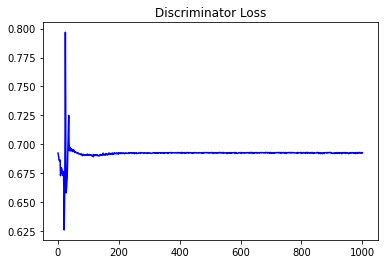

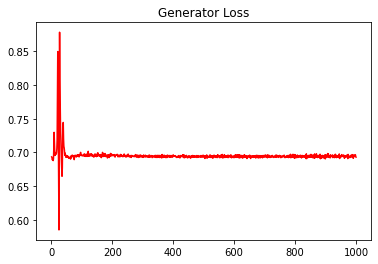

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.057862488324635294


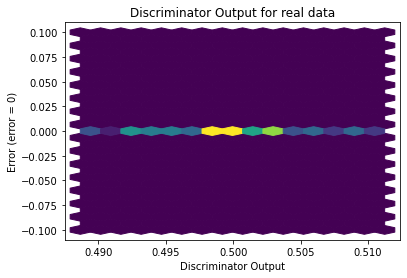

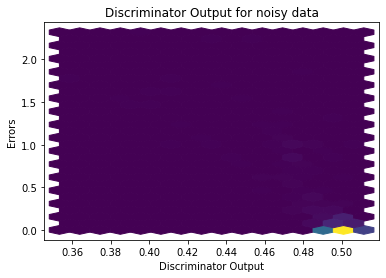

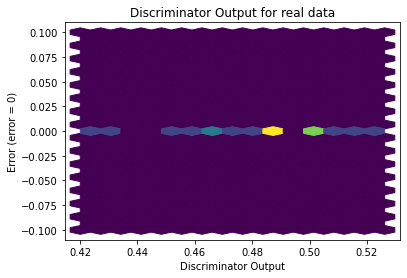

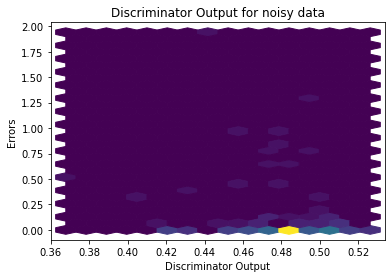

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


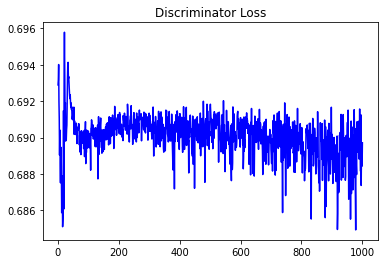

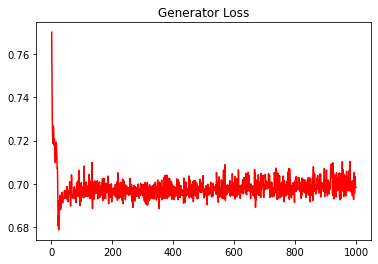

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03509522985822318


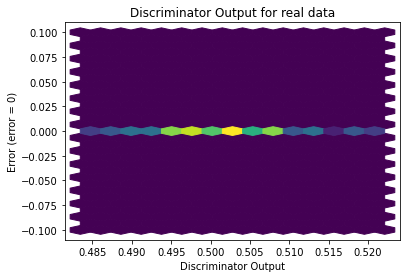

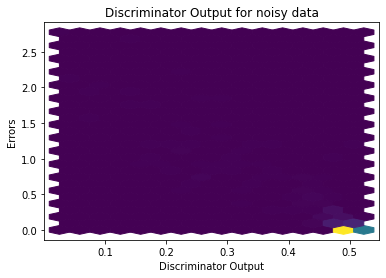

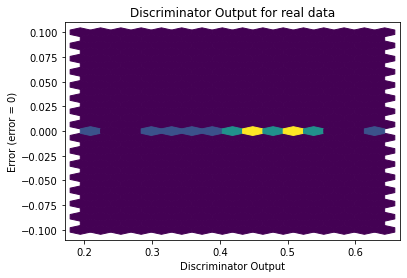

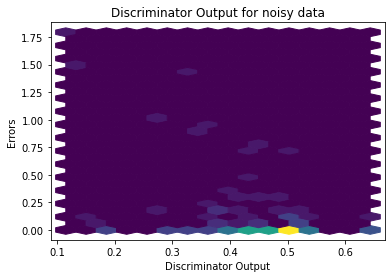

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1300]], requires_grad=True)
